In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

pd_read_csv = pd.read_csv("../input/StudentsPerformance.csv")
print(pd_read_csv.head())
print(pd_read_csv.dtypes)
print(pd_read_csv.describe())

# Any results you write to the current directory are saved as output.

   gender race/ethnicity      ...      reading score writing score
0  female        group B      ...                 72            74
1  female        group C      ...                 90            88
2  female        group B      ...                 95            93
3    male        group A      ...                 57            44
4    male        group C      ...                 78            75

[5 rows x 8 columns]
gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000 

In [6]:
#added a average score column for better representation
pd_read_csv['average score']= (pd_read_csv['math score']+pd_read_csv['reading score']+pd_read_csv['writing score'])/3
print(pd_read_csv.head())

   gender race/ethnicity      ...      writing score average score
0  female        group B      ...                 74     72.666667
1  female        group C      ...                 88     82.333333
2  female        group B      ...                 93     92.666667
3    male        group A      ...                 44     49.333333
4    male        group C      ...                 75     76.333333

[5 rows x 9 columns]


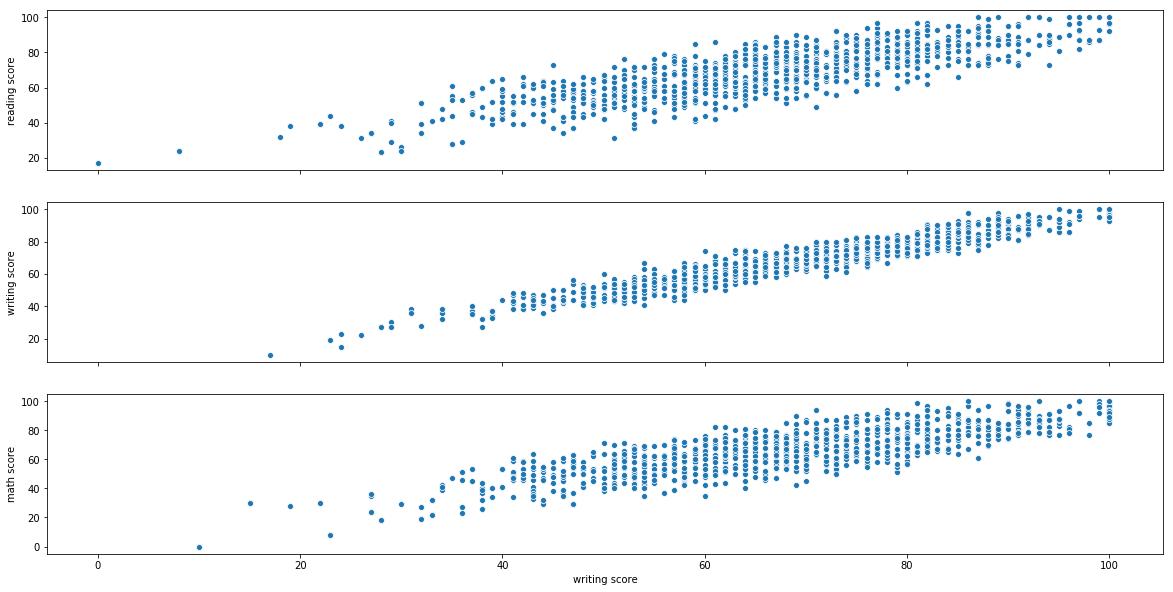

In [9]:
#relationship between scores
s,axes = plt.subplots(nrows=3, figsize=(20, 10), sharex=True)
sns.scatterplot(x="math score", y="reading score", data=pd_read_csv, ax=axes[0])
sns.scatterplot(x="reading score", y="writing score", data=pd_read_csv, ax=axes[1])
sns.scatterplot(x="writing score", y="math score", data=pd_read_csv, ax=axes[2])
plt.show()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


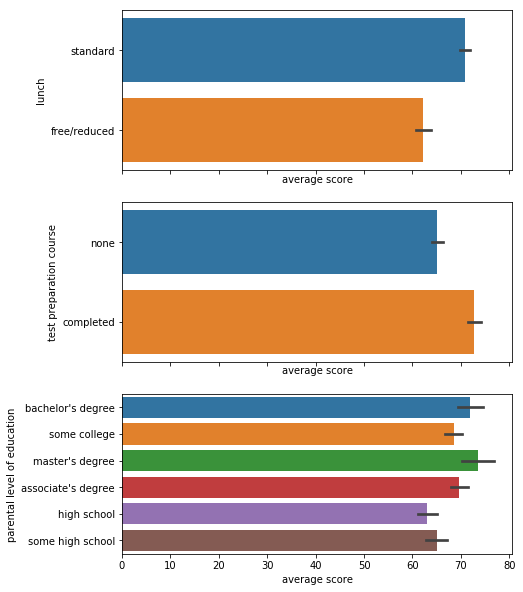

In [11]:
#multiple relationships
s,axes = plt.subplots(nrows=3, figsize=(7, 10), sharex=True)
#relation between lunch and scores
sns.barplot(x="average score", y="lunch", data=pd_read_csv, ax=axes[0])
#relation between preparation and score
sns.barplot(x="average score", y="test preparation course", data=pd_read_csv, ax=axes[1])
#relation between parental level of education
sns.barplot(x="average score", y="parental level of education", data=pd_read_csv, ax=axes[2])
plt.show()

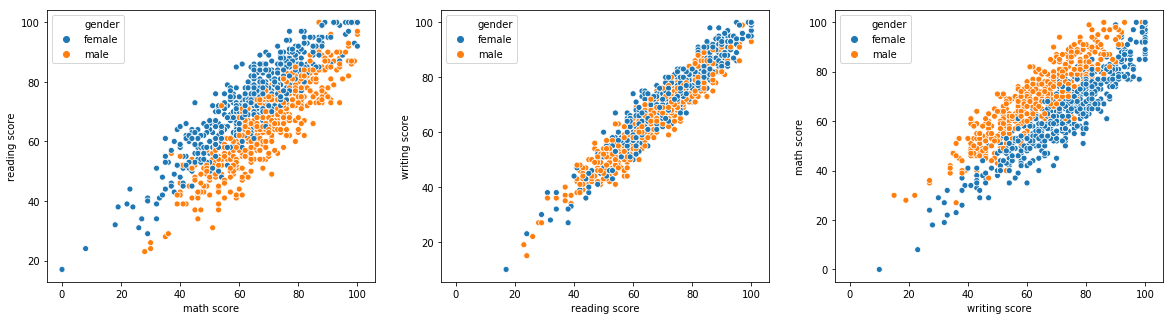

In [12]:
#relationship between scores (gender analysis)
f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
sns.scatterplot(x="math score", y="reading score", data=pd_read_csv, ax=axes[0], hue="gender")
sns.scatterplot(x="reading score", y="writing score", data=pd_read_csv, ax=axes[1], hue="gender")
sns.scatterplot(x="writing score", y="math score", data=pd_read_csv, ax=axes[2], hue="gender")
plt.show()

In [15]:
#encoding for regression
#this is totally basic and manual encoding technique, i do not recommend to use this XD
'''
encode_dict = {"gender": {"female": 0, "male": 1},
               "lunch": {"standard": 0, "free/reduced": 1},
               "test preparation course": {"none": 0, "completed": 1},
               "race/ethnicity": {"group A":0, "group B":1, "group C":2, "group D":3, "group E":4},
               "parental level of education": {"high school":0, "some high school":1, "some college":2,
                                               "associate's degree":3, "bachelor's degree":4, "master's degree":5}}


pd_read_csv.replace(encode_dict, inplace=True)
pd_read_csv.head()

'''

'\nencode_dict = {"gender": {"female": 0, "male": 1},\n               "lunch": {"standard": 0, "free/reduced": 1},\n               "test preparation course": {"none": 0, "completed": 1},\n               "race/ethnicity": {"group A":0, "group B":1, "group C":2, "group D":3, "group E":4},\n               "parental level of education": {"high school":0, "some high school":1, "some college":2,\n                                               "associate\'s degree":3, "bachelor\'s degree":4, "master\'s degree":5}}\n\n\npd_read_csv.replace(encode_dict, inplace=True)\npd_read_csv.head()\n\n'

In [17]:
#prepare X and y
X = pd_read_csv[['math score', 'writing score', 'reading score']]
scaler = MinMaxScaler()  # scale to [0,1]
X = scaler.fit_transform(X)
z = np.array(pd_read_csv['gender']) #we require 1d array for prediction not a vector
y = z

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [20]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [24]:
#training
svm = SVC(kernel='rbf', degree=2, probability=True)#using a gaussian kernel
svm.fit(X_train, y_train)
svm_prediction = svm.predict_proba([[0.90,0.80,0.89]])#prediction time, ofcourse you can chage it to get predictions
print(svm_prediction)

[[0.28826407 0.71173593]]


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
#make predictions
y_pred = svm.predict(X_test)

#how was it???
print('acc =', svm.score(X,y))
##print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))


acc = 0.859
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       109
           1       0.90      0.78      0.84        91

   micro avg       0.86      0.86      0.86       200
   macro avg       0.87      0.85      0.86       200
weighted avg       0.86      0.86      0.86       200

